<p>3. Realizar un pequeño análisis donde se respondan a las siguientes preguntas de
negocio:</p>
<p>a. ¿Cuál es el tweet con mayor repercusión social?</p>
<p>b. ¿Cuál es el usuario que más menciona a la escuela?</p>
<p>c. ¿En qué mes se concentra el mayor número de tweets?</p>
<p>d. ¿Qué palabras son más frecuentes?</p>
<p>e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?</p>
<p>f. ¿Has sacado alguna conclusión extra en tu análisis?</p>

In [1]:
import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DB='../data/DB_twitter.db'

sql = sqlite3.connect(DB)

query= '''Select t.*, u.name, u.username FROM tweets t JOIN users u ON t.user_id = u.user_id'''
# query= '''Select t.* FROM tweets t'''

df = pd.read_sql(query,sql,index_col=['id'])

sql.close()

In [27]:
df.shape

(166, 13)

-----
-----
------
<p>a. ¿Cuál es el tweet con mayor repercusión social?</p>

In [4]:
# Con más Retweets
df[df['retweets_count']==df['retweets_count'].max()]

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username
id,,,,,,,,,,
1564951151124029441,"¿Quieres impulsar tu perfil profesional en el ámbito digital? 🔥¡Descubre los #bootcamps de @ENCamaraSevilla y @TheBridge_Tech y despega en el sector tecnológico! 🚀La formación más innovadora en #DesarrolloWeb #FullStack, #DataScience y #Ciberseguridad: https://t.co/dI7Go0yJsW https://t.co/598NsYg0Ud",es,2022-08-31,14:20:04,11,0,13,106344840,Cámara de Comercio de Sevilla,camaradesevilla


In [5]:
# Número de Retweets totales
df['retweets_count'].sum()

162

-----

In [6]:
# Con más Likes
df[df['likes_count']==df['likes_count'].max()]

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username
id,,,,,,,,,,
1542206287915585536,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp,es,2022-06-29,20:00:06,3,2,22,1255794072280842240,Heavy Mental,heavymental_es
1541678686751133698,Gracias @HeavyMental_es por la tarde de ayer y a todos los asistentes ¡Éxito absoluto! 🎙👏,es,2022-06-28,09:03:36,4,0,22,1162694149956603904,The Bridge,thebridge_tech


In [7]:
# Número de Likes totales
df['likes_count'].sum()

556

-----

In [8]:
# Con más Respuestas
df[df['replies_count']==df['replies_count'].max()].head()

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username
id,,,,,,,,,,
1541046264539893760,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech 🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D",es,2022-06-26,15:10:35,6,6,17,1255794072280842240,Heavy Mental,heavymental_es
1536310176801857538,"¡Últimas1⃣0⃣entradas! El lunes 27 de junio acogeremos la grabación de ""El sentido de la vida ya no es 42"" un episodio del podcast de @HeavyMental_es, donde presentarán ""El pequeño libro de la filosofía estoica"" de @Alienta Si quieres asistir como público👉 https://t.co/Vp0zHYIRua",es,2022-06-13,13:31:04,2,6,4,1162694149956603904,The Bridge,thebridge_tech


In [9]:
# Número de Respuestas totales
df['replies_count'].sum()

68

---

In [10]:
# Tweet con más interacciones en total
df['interaction']=df['retweets_count']+df['likes_count']+df['replies_count']
df[df['interaction']==df['interaction'].max()].head()


,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username,interaction
id,,,,,,,,,,,
1541046264539893760,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech 🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D",es,2022-06-26,15:10:35,6,6,17,1255794072280842240,Heavy Mental,heavymental_es,29


In [11]:
# # Número de Interacciones totales
df['interaction'].sum()

786

-----
-----
-----
<p>b. ¿Cuál es el usuario que más menciona a la escuela?</p>

In [12]:
df_most=pd.DataFrame(df['username'].value_counts())
df_most

,username
thebridge_tech,32
heavymental_es,10
mulder01198676,8
designetworking,6
joobid,6
...,...
camaradesevilla,1
antonio_muniz_c,1
mtortosal,1
equiposytalento,1


-----
-----
-----
<p>c. ¿En qué mes se concentra el mayor número de tweets?</p>

In [13]:
df['date_datetime'] = pd.to_datetime(df['date'])
df['month'] = df['date_datetime'].dt.month

In [14]:
df_month=pd.DataFrame(df['month'].value_counts())
df_month

,month
6,85
9,30
7,30
8,15
10,6


<AxesSubplot:>

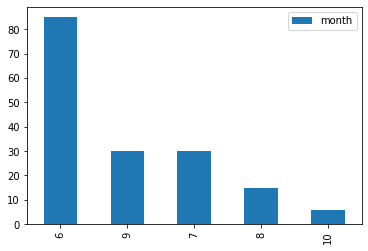

In [31]:
df_month.plot(kind='bar')

In [15]:
print('6 = Junio')
print('7 = Julio')
print('8 = Agosto')
print('9 = Septiembre')
print('10 = Octubre')

6 = Junio
7 = Julio
8 = Agosto
9 = Septiembre
10 = Octubre


----
----
----
<p>d. ¿Qué palabras son más frecuentes?</p>


In [16]:
df.head(1)

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username,interaction,date_datetime,month
id,,,,,,,,,,,,,
1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,es,2022-10-05,15:39:43,2,0,3,1162694149956603904,The Bridge,thebridge_tech,5,2022-10-05,10


In [17]:
df_words = df
# Aplicamos Stopwords
from nltk.corpus import stopwords 

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

df_words['tweet'] = df_words['tweet'].apply(remove_stopwords)
df_words.head(1)

,tweet,language,date,time,retweets_count,replies_count,likes_count,user_id,name,username,interaction,date_datetime,month
id,,,,,,,,,,,,,
1577654769098842112,Ya aquí primeros mini emprendedores 🤩 pasándoselo grande mientras empiezan proceso ideación proyectos- Con programa @GenyusSchool descubren YO emprendedor mientras divierten👏 ¡Aún tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,es,2022-10-05,15:39:43,2,0,3,1162694149956603904,The Bridge,thebridge_tech,5,2022-10-05,10


In [18]:
from collections import Counter
Counter(" ".join(df_words["tweet"]).split()).most_common(50)

[('@TheBridge_Tech', 122),
 ('@HeavyMental_es', 61),
 ('@GuillermoDeHaro', 45),
 ('@Recuenco', 44),
 ('@_miki', 29),
 ('@DavidAlayon', 26),
 ('@Mulder01198676', 12),
 ('formación', 11),
 ('talento', 10),
 ('Si', 10),
 ('@Alienta', 10),
 ('#bootcamp', 9),
 ('El', 9),
 ('gracias', 9),
 ('convenio', 9),
 ('Gracias', 9),
 ('@uriondo', 9),
 ('primera', 8),
 ('si', 8),
 ('La', 8),
 ('profesionales', 7),
 ('vida', 7),
 ('nuevo', 7),
 ('@JotDownSpain', 7),
 ('@moquintana', 7),
 ('hacer', 6),
 ('@TheBridge_Tech,', 6),
 ('Hoy', 6),
 ('acuerdo', 6),
 ('ser', 6),
 ('sector', 6),
 ('#ciberseguridad', 6),
 ('Que', 6),
 ('No', 6),
 ('mientras', 5),
 ('programa', 5),
 ('Un', 5),
 ('colaboración', 5),
 ('quieres', 5),
 ('digital', 5),
 ('Y', 5),
 ('evento', 5),
 ('empresas', 5),
 ('demanda', 5),
 ('info', 5),
 ('Más', 5),
 ('@Fujitsu_ES', 5),
 ('firman', 5),
 ('aceleradora', 5),
 ('millones', 5)]

----
----
----
<p>e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?</p>

In [19]:
df[['retweets_count', 'replies_count', 'likes_count']].head(1)

,retweets_count,replies_count,likes_count
id,,,
1577654769098842112,2,0,3


In [20]:
df[['retweets_count', 'replies_count', 'likes_count']].corr()

,retweets_count,replies_count,likes_count
retweets_count,1.000000,0.135162,0.679553
replies_count,0.135162,1.000000,0.314092
likes_count,0.679553,0.314092,1.000000


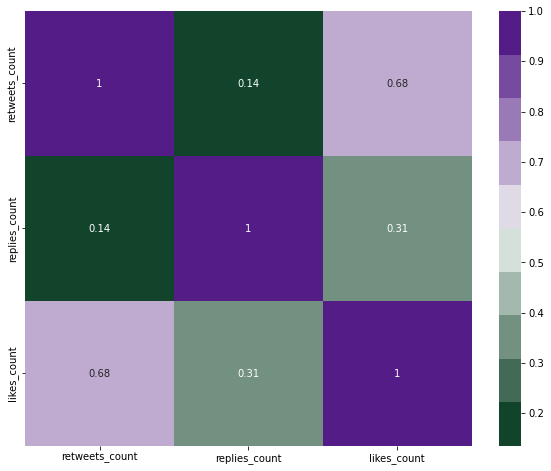

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['retweets_count', 'replies_count', 'likes_count']].corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

---
---
---
<p>f. ¿Has sacado alguna conclusión extra en tu análisis?</p>

In [ ]:
# {0: 119, 1: 47}
# Vemos que la mayoría de los tweets son positos: 119 de 166 (Sacado del notbook Modelo_1_0)

In [22]:
# Vemos que la mayoría de interacciones y menciones son entre parte del staff de la propia escuela: thebridge_tech y heavymental_es
# Esto es algo malo, ya que el objetivo es que alumnos y gente de fuera hable de la escuela

In [23]:
# Más de la mitad de lo tweets son de Junio. 85 de 166

In [24]:
# 166 de los 179 son en Español. Siendo el segundo el Inglés. (Sacado del notebook Crear tabla SQL 1_0(TWINT))
# Esto no es un problema ya que actualmente la escuela solo ofrece los cursos en Español.

In [25]:
# Los retweets y likes están muy relacionados

In [26]:
# Uno de los usuarios más mencionados es GuillermoDeHaro, pero vemos que este usuario no ha interactuado ni una sola vez 
# mencionando a thebridge_tech